In [4]:
import pickle
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import random
import json
import os
import re
import seaborn as sns
import math
import sys
import copy
from matplotlib.ticker import FormatStrFormatter

In [5]:
class Flowkey:
    def __init__(self, key, src_addr, src_port, dst_addr, dst_port, proto):
        self.key = key
        self.src_addr = src_addr
        self.src_port = src_port
        self.dst_addr = dst_addr
        self.dst_port = dst_port
        self.proto = proto

    def __repr__(self):
        return "%15u %15u %5u %5u %5u" % (self.src_addr, self.dst_addr, self.src_port, self.dst_port, self.proto)

    def __eq__(self, other):
        if self.key == other.key and \
            self.src_addr == other.src_addr and \
            self.src_port == other.src_port and \
            self.dst_addr == other.dst_addr and \
            self.dst_port == other.dst_port and \
            self.proto == other.proto:
            return True
    
    def null(self):
        if self.src_addr == 0 and self.src_port == 0 and self.dst_addr == 0 and self.dst_addr == 0 and self.proto == 0:
            return True
        return False

def parse_line(key, line):
    string_key = line.split(") ")[0]
    string_key += ")"

    left = line.split(") ")[1]

    left = left.replace("]", "")
    left = left.replace("[", "")
    splitted = left.split(" ")
    estimate = int(splitted[0])

    flowkey = Flowkey(key, int(splitted[1]), int(splitted[2]), int(splitted[3]), int(splitted[4]), int(splitted[5]))

    return string_key, estimate, flowkey

In [2]:
## parameters

caida = ["caida-500w", "caida-250w", "caida-125w", "caida-50w"]
zipf2 = ["zipf2-250w", "zipf2-125w", "zipf2-50w"]
zipf1 = ["zipf1-250w", "zipf1-125w", "zipf1-50w"]


lens = [
        # ["5", "5"],
        ["6", "4"],
        # ["7", "3"],
        # ["8", "2"],
        ]

pcap_file = []
    
# # single dataset
pcap_file.append("caida-500w_10_.pcap")
pcap_file.append("caida-250w_10_.pcap")
pcap_file.append("caida-125w_10_.pcap")
pcap_file.append("caida-50w_10_.pcap")
pcap_file.append("zipf2-250w_10_.pcap") 
pcap_file.append("zipf2-125w_10_.pcap") 
pcap_file.append("zipf2-50w_10_.pcap") 
pcap_file.append("zipf1-250w_10_.pcap") 
pcap_file.append("zipf1-125w_10_.pcap") 
pcap_file.append("zipf1-50w_10_.pcap") 

### caida + zipf2 [10:22]
for a in caida:
    for b in zipf2:
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
### zipf2 + caida [22:34]
for a in zipf2:
    for b in caida:
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
### caida + zipf1 [34:46]
for a in caida:
    for b in zipf1:
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
### zipf1 + caida [46:58]
for a in zipf1:
    for b in caida:
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
### zipf2 + zipf1 [58:67]
for a in zipf2:
    for b in zipf1:
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
### zipf1 + zipf2 [67:76]
for a in zipf1:
    for b in zipf2:
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
### caida + caida [76:88]
for a in caida:
    for b in caida:
        if a == b:
            continue
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
### zipf2 + zipf2 [88:94]
for a in zipf2:
    for b in zipf2:
        if a == b:
            continue
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
### zipf1 + zipf1 [94:100]
for a in zipf1:
    for b in zipf1:
        if a == b:
            continue
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
print(pcap_file)    
print(f'Total Pcap File Number: {len(pcap_file)}')
# widths = [2048, 4096, 8192, 16384, 32768, 65536, 131072]
widths = [4096]
# widths = [1024]



['caida-500w_10_.pcap', 'caida-250w_10_.pcap', 'caida-125w_10_.pcap', 'caida-50w_10_.pcap', 'zipf2-250w_10_.pcap', 'zipf2-125w_10_.pcap', 'zipf2-50w_10_.pcap', 'zipf1-250w_10_.pcap', 'zipf1-125w_10_.pcap', 'zipf1-50w_10_.pcap', 'caida-500w_6_zipf2-250w_4.pcap', 'caida-500w_6_zipf2-125w_4.pcap', 'caida-500w_6_zipf2-50w_4.pcap', 'caida-250w_6_zipf2-250w_4.pcap', 'caida-250w_6_zipf2-125w_4.pcap', 'caida-250w_6_zipf2-50w_4.pcap', 'caida-125w_6_zipf2-250w_4.pcap', 'caida-125w_6_zipf2-125w_4.pcap', 'caida-125w_6_zipf2-50w_4.pcap', 'caida-50w_6_zipf2-250w_4.pcap', 'caida-50w_6_zipf2-125w_4.pcap', 'caida-50w_6_zipf2-50w_4.pcap', 'zipf2-250w_6_caida-500w_4.pcap', 'zipf2-250w_6_caida-250w_4.pcap', 'zipf2-250w_6_caida-125w_4.pcap', 'zipf2-250w_6_caida-50w_4.pcap', 'zipf2-125w_6_caida-500w_4.pcap', 'zipf2-125w_6_caida-250w_4.pcap', 'zipf2-125w_6_caida-125w_4.pcap', 'zipf2-125w_6_caida-50w_4.pcap', 'zipf2-50w_6_caida-500w_4.pcap', 'zipf2-50w_6_caida-250w_4.pcap', 'zipf2-50w_6_caida-125w_4.pcap', 'z

In [40]:
def read_sketch_flow_count(algo='cm', row=3, width=4096, level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], dataset='caida0517-125w_10_.pcap', topk=5000):
    
    flow_count = {}
    for epoch in epochs:
        
        path = f"../SketchPadding/{algo}/{dataset}/"\
                f"{flowkey}/row_{row}_width_{width}_level_{level}_epoch_{epoch}_count_{count}_seed_{seed}/"
        
        for dir in sorted(os.listdir(path)):
            p = os.path.join(path, dir)
            if os.path.isdir(p): 
                dynamic_full_path = os.path.join(p, "flowkey.txt")
                
                
                cnt = 0
                f = open(dynamic_full_path)
                key = f.readline().strip()
                # print(key)
                for line in f:
                    string_key, estimate, flowkey = parse_line(key, line.strip())
                    flow_count[string_key] = estimate      
                    
                    cnt+=1
                    if topk != 0 and cnt >= topk:
                        break   
                f.close()
            
    return flow_count

In [41]:
def read_gt_flow_count(algo='cm', row=3, width=4096, level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], dataset='caida0517-125w_10_.pcap', topk=5000):
    
    flow_count = {}
    for epoch in epochs:
        
        path = f"../SketchPadding/{algo}/{dataset}/"\
                f"{flowkey}/row_{row}_width_{width}_level_{level}_epoch_{epoch}_count_{count}_seed_{seed}/"
        
        for dir in sorted(os.listdir(path)):
            p = os.path.join(path, dir)
            if os.path.isdir(p): 
                dynamic_full_path = os.path.join(p, "ground_truth.txt")
                
                
                cnt = 0
                f = open(dynamic_full_path)
                key = f.readline().strip()
                # print(key)
                for line in f:
                    string_key, estimate, flowkey = parse_line(key, line.strip())
                    flow_count[string_key] = estimate   
                    
                    cnt+=1
                    if topk != 0 and cnt >= topk:
                        break         
                f.close()
            
    return flow_count

In [24]:
def cal_re(est, gt):
    if gt == 0:
        return 0
    are = round((abs(est-gt)/gt)*100, 1)
    return are

In [25]:
def get_re_pdf(sketch_fc, gt_fc):
    ARE = {}
    for key, val in sketch_fc.items():
        gt_val = 0
        if key in gt_fc.keys():
            gt_val = gt_fc[key]
            
        are = cal_are(val, gt_val)
        if are in ARE.keys():
            ARE[are] += 1
        else:
            ARE[are] = 1
            
    sorted_ARE = dict(sorted(list(ARE.items())))
    
    return sorted_ARE

In [65]:
def plot_impact_of_mem_cdf(dataset, widths, topk):
    
    error = []
    prob = []
    cdfs = []
    labels = []
    are = []
    all_re = {}
    
    for w in widths:
        est_fc = read_sketch_flow_count(algo='cm', row=3, width=w, level=1, seed=1, count=1, flowkey='srcIP', epochs=['10'], dataset=dataset, topk=topk)
        
        true_fc = read_gt_flow_count(algo='cm', row=3, width=w, level=1, seed=1, count=1, flowkey='srcIP', epochs=['10'], dataset=dataset, topk=topk)
        
        all_re[f'SK-{int(w*16/1024)}KB'] = get_re_pdf(est_fc, true_fc)
            
            
    linestyles = ['-.', '--', ':', '-']
    from matplotlib import cm
    greens = cm.Greens(np.linspace(0.4, 0.8, 4))
    colors_g = np.concatenate([greens])
    
    for name, pdf in all_re.items(): 
        re = list(pdf.keys())
        frequency = list(pdf.values()) 

        total_flows = sum(frequency)
        probabilities = [freq / total_flows for freq in frequency]
        
        cdf = np.cumsum(probabilities)
        
        
        error.append(re)
        prob.append(probabilities)
        cdfs.append(cdf)
        labels.append(name)
        are.append(round(sum(re)/total_flows, 2))
    
    plt.figure(figsize=(6, 6))
    # Plot CDF
    for i in range(len(error)):
        plt.plot(error[i], cdfs[i], label = f'{labels[i]} (ARE={are[i]})', linewidth=3, linestyle=linestyles[i%4], color=colors_g[i])
            
    plt.title(f'Impact of Memory ({dataset[:-9]})', fontsize=20)
    plt.xlabel('Relative Error', fontsize=18)
    plt.ylabel('Cumulative Probability', fontsize=18)
    plt.legend(loc="lower right", ncol=1, fontsize=16)
    # plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

    
    plt.xscale('log')  # Set x-axis scale to logarithmic
    # plt.ylim([-0.05,1.05])
    # plt.xlim([-10,100000])
    # plt.xticks([1, 10, 100, 1000, 10000, 100000], size=16)  # Set specific tick positions
    plt.xticks(size=16)  # Set specific tick positions
    plt.yticks(size=16)
    plt.grid(True)
    
    
    plt.tight_layout()
    plt.show()
        

In [68]:
def plot_impact_of_volumn_cdf(datasets, width, topk):
    
    error = []
    prob = []
    cdfs = []
    labels = []
    are = []
    all_re = {}
    
    for d in datasets:
        est_fc = read_sketch_flow_count(algo='cm', row=3, width=width, level=1, seed=1, count=1, flowkey='srcIP', epochs=['10'], dataset=d, topk=topk)
        
        true_fc = read_gt_flow_count(algo='cm', row=3, width=width, level=1, seed=1, count=1, flowkey='srcIP', epochs=['10'], dataset=d, topk=topk)
        
        all_re[f'SK-{d[:-9]}'] = get_re_pdf(est_fc, true_fc)
            
            
    linestyles = ['-.', '--', ':', '-']
    from matplotlib import cm
    greens = cm.Greens(np.linspace(0.4, 0.8, 4))
    colors_g = np.concatenate([greens])
    
    for name, pdf in all_re.items(): 
        re = list(pdf.keys())
        frequency = list(pdf.values()) 

        total_flows = sum(frequency)
        probabilities = [freq / total_flows for freq in frequency]
        
        cdf = np.cumsum(probabilities)
        
        
        error.append(re)
        prob.append(probabilities)
        cdfs.append(cdf)
        labels.append(name)
        are.append(round(sum(re)/total_flows, 2))
    
    plt.figure(figsize=(6, 6))
    # Plot CDF
    for i in range(len(error)):
        ls = linestyles[4-len(datasets):]
        plt.plot(error[i], cdfs[i], label = f'{labels[i]} (ARE={are[i]})', linewidth=3, linestyle=ls[i%len(datasets)], color=colors_g[i])
            
    plt.title(f'Impact of Data Volumn ({datasets[0].split("-")[0]})', fontsize=20)
    plt.xlabel('Relative Error', fontsize=18)
    plt.ylabel('Cumulative Probability', fontsize=18)
    plt.legend(loc="lower right", ncol=1, fontsize=16)
    # plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    
    plt.xscale('log')  # Set x-axis scale to logarithmic
    # plt.ylim([-0.05,1.05])
    # plt.xlim([-10,100000])
    # plt.xticks([1, 10, 100, 1000, 10000, 100000], size=16)  # Set specific tick positions
    plt.xticks(size=16)  # Set specific tick positions
    plt.yticks(size=16)
    plt.grid(True)
    
    
    plt.tight_layout()
    plt.show()
        

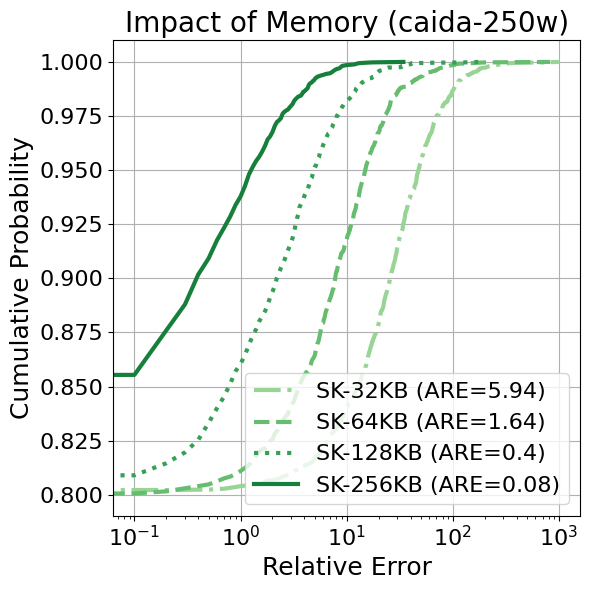

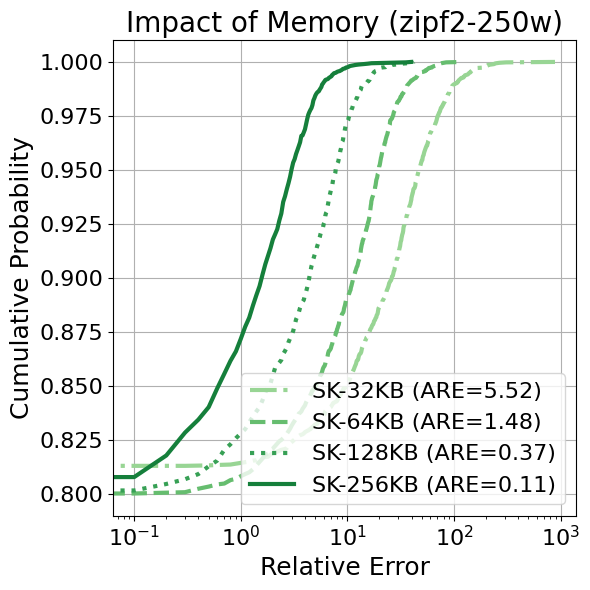

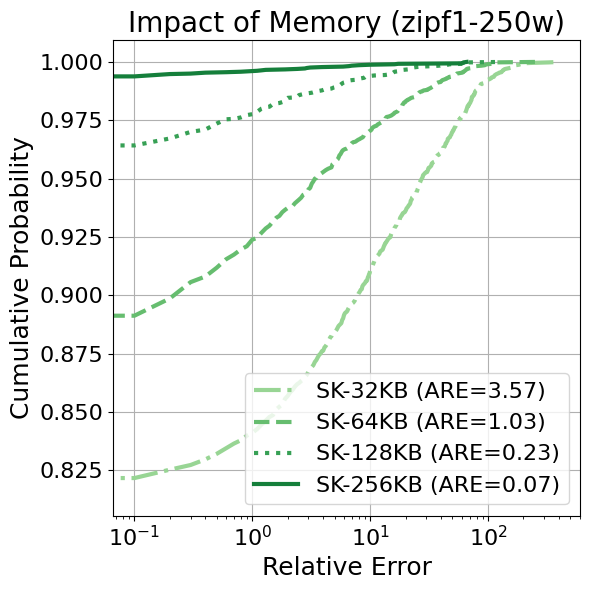

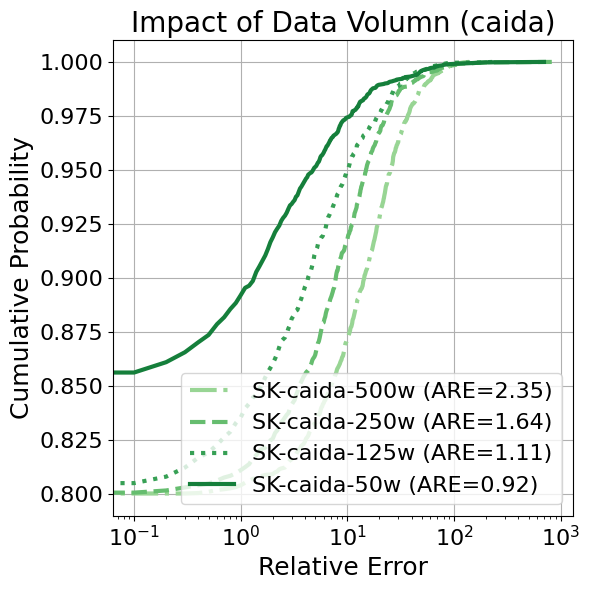

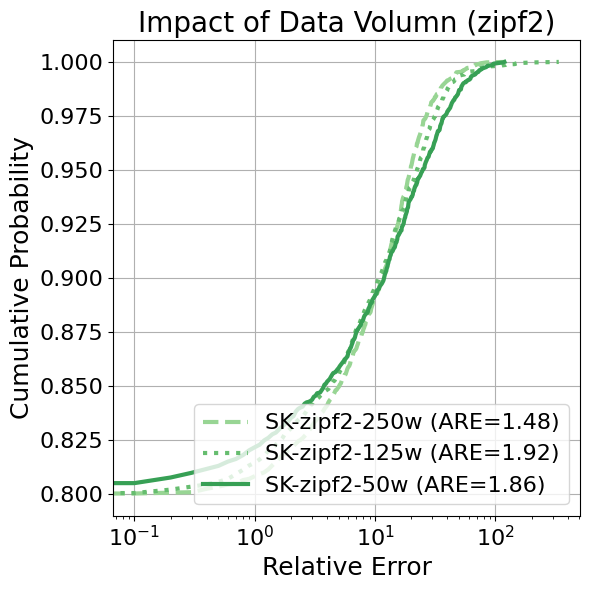

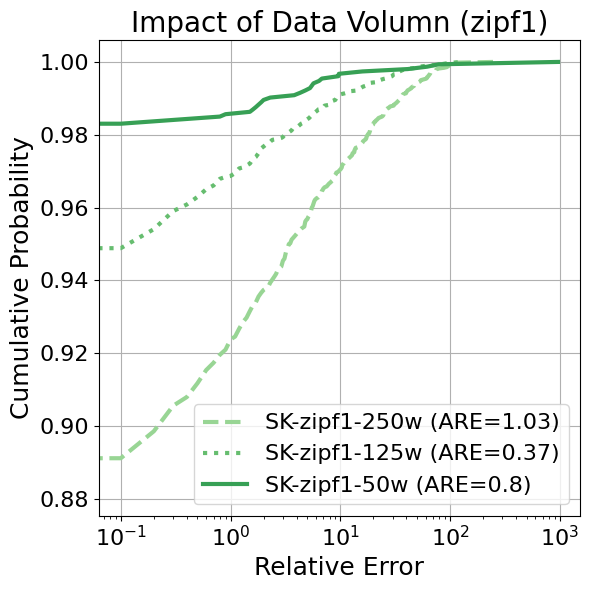

In [69]:
plot_impact_of_mem_cdf(dataset=pcap_file[1], widths=[2048, 4096, 8192, 16384], topk=5000)
plot_impact_of_mem_cdf(dataset=pcap_file[4], widths=[2048, 4096, 8192, 16384], topk=5000)
plot_impact_of_mem_cdf(dataset=pcap_file[7], widths=[2048, 4096, 8192, 16384], topk=5000)

plot_impact_of_volumn_cdf(datasets=pcap_file[:4], width=4096, topk=5000)
plot_impact_of_volumn_cdf(datasets=pcap_file[4:7], width=4096, topk=5000)
plot_impact_of_volumn_cdf(datasets=pcap_file[7:10], width=4096, topk=5000)